# Proyecto 2 Ingeniería de datos, Modelos Avanzados
---
Entregado por: Rogelio Pettenon

https://github.com/rpettenon


---



## 1- Entendimiento del negocio

###Objetivo de negocio
**PROPERATI** Es una plataforma web y mobile de propiedades que nació para cambiar la forma en que se venden y arriendan inmuebles en Latinoamérica

**Misión**: La misión de Properati es empoderar a nuestros usuarios para que tengan el mejor camino a su próxima casa, mediante herramientas tecnológicas y datos relevantes. En paralelo, buscamos ayudar a los vendedores a que sean más eficientes y brinden el mejor servicio posible a los potenciales compradores.

**Visión**: Ser la plataforma de inmuebles más enfocada en el usuario del mundo, sin importar dónde se encuentre. Tenemos un horizonte global, pero también la versatilidad necesaria para satisfacer las necesidades locales.

**Comprensión de los datos**
Debajo se detallan los campos del dataset para tener entendimineto de los mismos. 

Datos provistos por <a href='https://www.properati.com.ar'>Properati</a>

* type - Tipo de aviso (Propiedad, Desarrollo/Proyecto).
* country - País en el que está publicado el aviso (Argentina, Uruguay, Colombia, Ecuador, Perú)
* id - Identificador del aviso. No es único: si el aviso es actualizado por la inmobiliaria (nueva versión del aviso) se crea un nuevo registro con la misma id pero distintas fechas: de alta y de baja.
* start_date - Fecha de alta del aviso.
* end_date - Fecha de baja del aviso.
* created_on - Fecha de alta de la primera versión del aviso.
* place - Campos referidos a la ubicación de la propiedad o del desarrollo.
* lat - Latitud.
* lon - Longitud.
* l1 - Nivel administrativo 1: país.
* l2 - Nivel administrativo 2: usualmente provincia.
* l3 - Nivel administrativo 3: usualmente ciudad.
* l4 - Nivel administrativo 4: usualmente barrio.
* property - Campos relativos a la propiedad (vacío si el aviso es de un desarrollo/proyecto).
* operation - Tipo de operación (Venta, Alquiler).
* type - Tipo de propiedad (Casa, Departamento, PH).
* rooms - Cantidad de ambientes (útil en Argentina).
* bedrooms - Cantidad de dormitorios (útil en el resto de los países).
* bathrooms - Cantidad de baños.
* surface_total - Superficie total en m².
* surface_covered - Superficie cubierta en m².
* price - Precio publicado en el anuncio.
* currency - Moneda del precio publicado.
* price_period - Periodo del precio (Diario, Semanal, Mensual)
* title - Título del anuncio.
* description - Descripción del anuncio.
* development - Campos relativos al desarrollo inmobiliario (vacío si el aviso es de una propiedad).
* status - Estado del desarrollo (Terminado, En construcción, ...)
* name - Nombre del desarrollo.
* short_description - Descripción corta del anuncio.
* description - Descripción del anuncio.

### Objetivos de minería de datos

* Realizar una exploración de datos de inmuebles en diversas zonas de argentina (datos de properati) con el fin de resolver las siguientes preguntas:
 * Qué tamaño tiene el conjunto de datos
 * Cuántos valores faltantes hay en las columnas
 * Cúal es la distribución de cada variable (histogramas y gráficos de barras)
 * Cómo se relacionan las variables entre si
 * Qué tipos de gráficos son los más convenientes para presentar la información
 * Cómo están correlacionadas las variables numéricas
 * Qué tipos de gráficos son los más convenientes para presentar la información
 * Cuáles son los mejores predictores de las variables de interés (Precio)   



* Generar procesos de transformación de datos
    * Deteccion y eliminacion de outliers
    * encoding
    * Escalado
* Generar los modelos seleccionados
    * Decision Tree 
    * Random Forest
    * XGBOOST
    * SVM
* Interpretar los modelos
    * Determinar qué variables son importantes (emplear feature_importances de los modelos

        
    


### Plan de proceso

Se realiará el trabajo en base a metodología CRISP-DM utilizando las primeras cuatro etapas

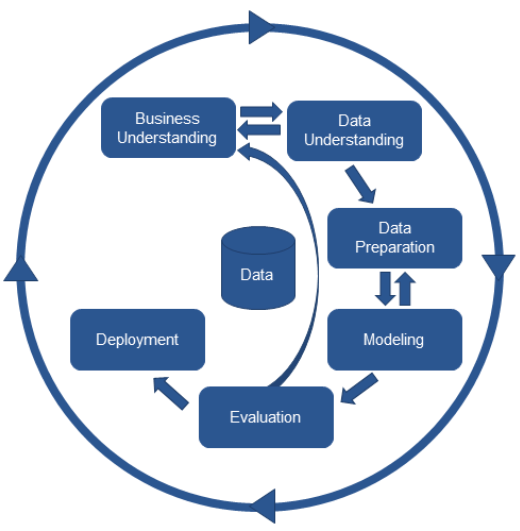

El objetivo es poder predecir el mejor precio de venta de propiedades. Para ello debemos utilizar Ingeniería de datos y modelos avanzados


Pasos para poder conseguir todo lo necesario del negocio

## 2- Entendimiento de los datos

### Recoleción de los datos

In [1]:
#Librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer 
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [2]:
# Clase para dar formato al texto
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
# Me conecto al drive de google
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Leo el archivo y convierto a dataframe para trababarlo posteriormente
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Acamica_Proyecto1/DS_Proyecto_01_Datos_Properati.csv")
df = pd.DataFrame(data)

df.head(2)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta


### Describir los datos

DESCRIPCION DE METADATOS

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje


### Explorar los datos

Exploración de datos libreria Pandas-Profiling

In [ ]:
!pip install Pandas-Data-Exploration-Utility-Package
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248502 sha256=e212da6f350c1b1d5d13126ec8acec5639f910f6487fd4046c6725ed8498aa24
  Stored in directory: /tmp/pip-ephem-wheel-cache-k1ef4qy1/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, 
                        title="Exploración de datos con Pandas Profiling",
                        html={'style':{'full_width':True}},minimal=True)
profile

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Conclusión de Exploración de datos:**

* Existen 7138 registros con cantidad de dormitorios igual a cero, revisaré el tipo de propiedades para entender mejor los datos
* valores de rooms de hasta 35
* 73,2 % de los registros son departamentos
* 4 registros con precio 11111111 me hace presuponer que es un datos erroneo
* Gran dispersión de la variable a predecir




In [ ]:
# Cantidad de propiedades con baño igual a cero por tipo de propieadad
tipo_propiedad_con_dormitorios0 = df[df.bedrooms==0].groupby(['property_type']).size().to_frame().rename(
    columns={0:'Cantidad'}).sort_values(
        by="Cantidad", ascending=False).reset_index()

In [ ]:
tipo_propiedad_con_dormitorios0.style.background_gradient(cmap='Blues')

,property_type,Cantidad
0,Departamento,3975
1,Casa,1476
2,Lote,600
3,Local comercial,266
4,Cochera,253
5,Depósito,253
6,Oficina,211
7,Otro,79
8,PH,16
9,Casa de campo,9


Habría que ver si los departamentos son monoambientes lo que explicaría el caso, no así para las propiedades tipo casa y PH.

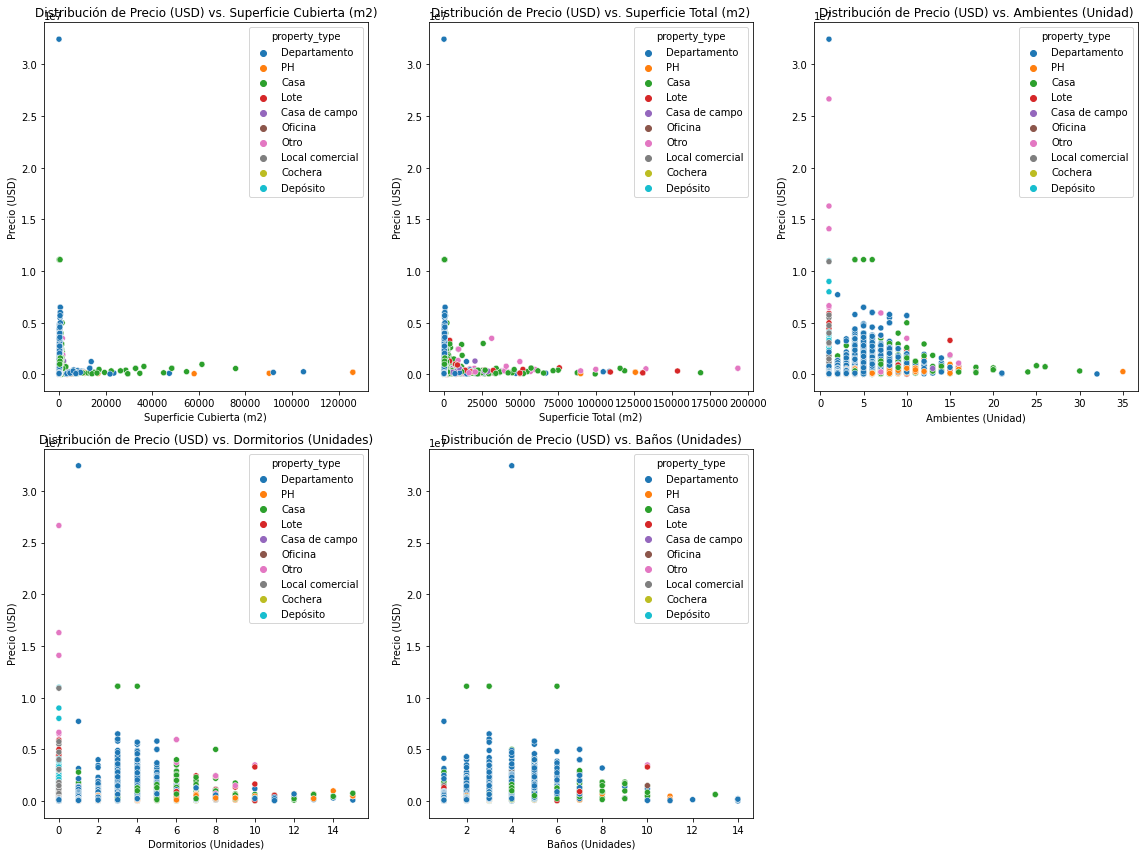

In [ ]:
plt.figure(figsize = (16,12))

vars_to_plot = ['surface_covered', 'surface_total','rooms','bedrooms','bathrooms']
vars_label = ['Superficie Cubierta (m2)', 'Superficie Total (m2)','Ambientes (Unidad)','Dormitorios (Unidades)','Baños (Unidades)']
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,3,i+1)
    sns.scatterplot(x = var, y='price', data = df, hue='property_type')
    title_string = "Distribución de Precio (USD) vs. " + vars_label[i]
    plt.ylabel("Precio (USD)")
    plt.xlabel(vars_label[i], rotation='0')
    plt.tight_layout()
    plt.title(title_string)

Frecuencia de de superficie total, superficie cubierta y precio por tipo de propiedad


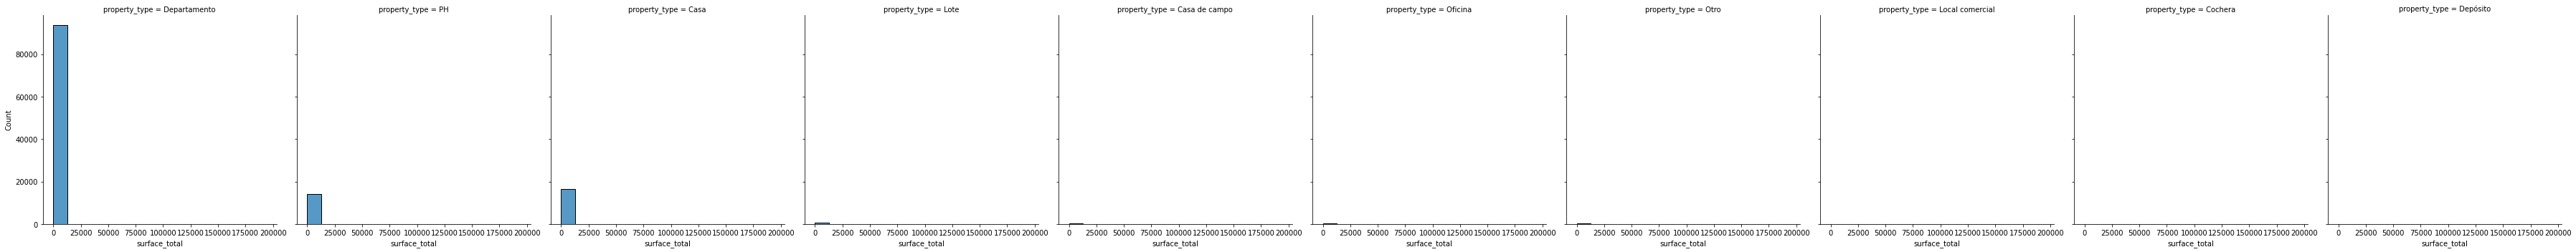

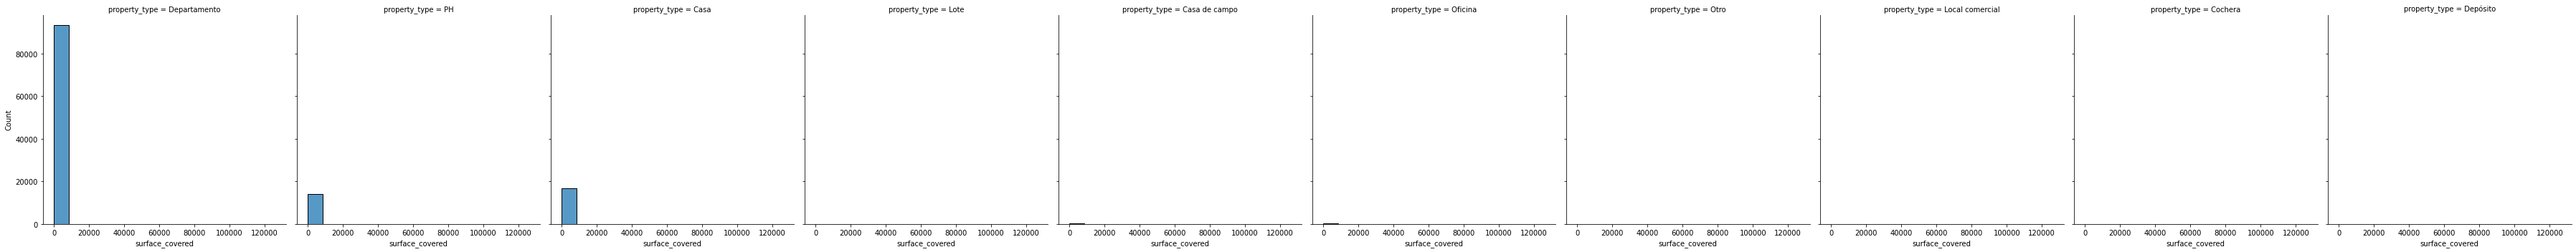

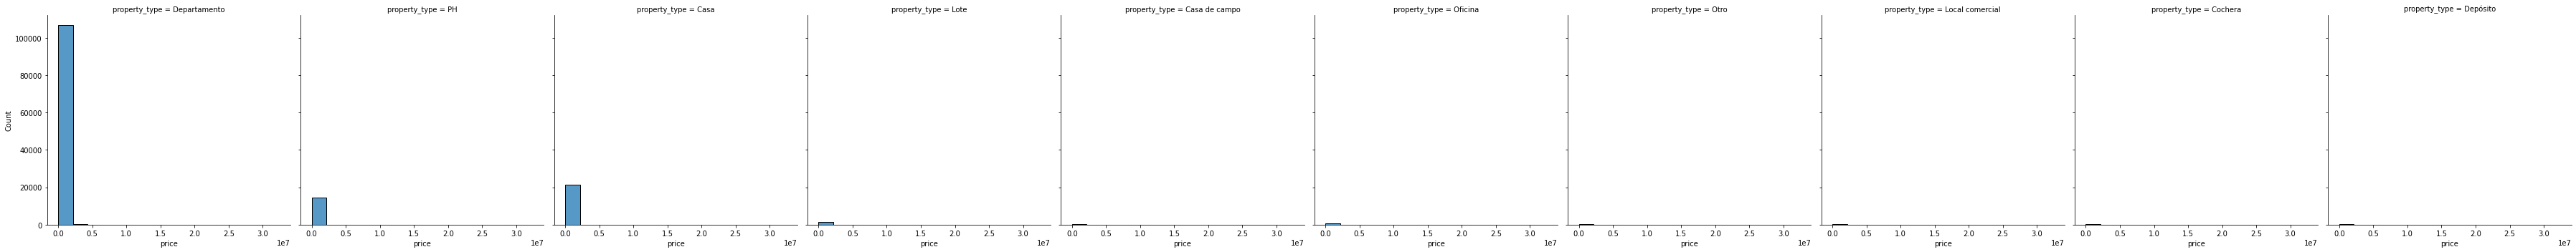

In [ ]:
print(color.BOLD + 'Frecuencia de de superficie total, superficie cubierta y precio por tipo de propiedad')
sns.displot(data=df, x="surface_total",col="property_type", common_norm=False, bins = 15)
sns.displot(data=df, x="surface_covered", col="property_type", common_norm=False, bins = 15)
sns.displot(data=df, x="price", col="property_type", common_norm=False, bins = 15, )

### Verificar la calidad de los datos

In [ ]:
#Tamaño del dataframe
print(color.BLUE + "Tamaño de dataframe",df.shape[0],'Registros y', df.shape[1], 'columnas')

Tamaño de dataframe 146660 Registros y 19 columnas


In [ ]:
print(color.BLUE + "Valores faltantes\n","--"*30,"\n", df.isnull().sum())

Valores faltantes
 ------------------------------------------------------------ 
 start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


In [ ]:
print(color.BLUE + "Valores faltantes: ", round(100*df.isnull().sum().sum()/df.shape[0],2),'%')

Valores faltantes:  46.35 %


Tengo un 46,35% de valores faltantes, luego se tratará este tema

## 3- Preparación de los datos

### Descripción de los datos

In [ ]:
# Estadistica descriptiva de las variables numericas
df[["lat","lon","rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]].describe().style.background_gradient(cmap='Blues')


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,146660.000000
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,241221.080199
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,318519.461370
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5500.000000
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,111000.000000
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,166000.000000
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,265000.000000
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,32434232.000000


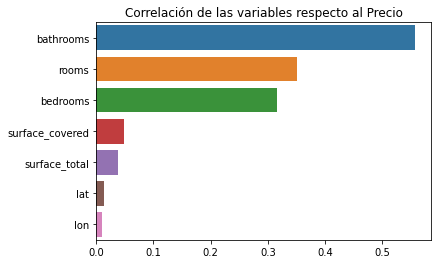

In [ ]:
#Correlación de variables respecto del Precio

correlations =df.corr().abs()['price'].sort_values(ascending=False)[1:]
ax = sns.barplot(x=correlations.values,y=correlations.index).set_title('Correlación de las variables respecto al Precio')

Del proyecto 1 se que las variables que mayor importancia tienen para el modelos son:

* Surface_covered      0,591
* lon                  0,168
* lat                  0,148
* surface_total        0,0494
* bathrooms            0,0201
* rooms                0,0177
* bedrooms             0,00479

Por lo que debo ser lo más minusioso posible a la hora de imputar valores en aquellas variables que tengan más importancia para el modelo







In [ ]:
# Cantidad de propiedades por Barrio
print(color.BOLD +"Cantidad de propiedades por Barrio\n","---"*20)
cantidad_por_barrio = df.groupby(['l2','l3']).size().to_frame().rename(
    columns={0:'Cantidad'}).sort_values(
        by="Cantidad", ascending=False).reset_index()

cantidad_por_barrio.rename(
    columns={'l2':'Zona','l3':'Barrio'}).style.background_gradient(cmap='Blues')

Cantidad de propiedades por Barrio
 ------------------------------------------------------------


,Zona,Barrio,Cantidad
0,Capital Federal,Palermo,13073
1,Bs.As. G.B.A. Zona Norte,Tigre,8718
2,Capital Federal,Almagro,7527
3,Capital Federal,Belgrano,6935
4,Capital Federal,Caballito,6650
5,Capital Federal,Villa Crespo,6494
6,Capital Federal,Recoleta,5917
7,Bs.As. G.B.A. Zona Sur,La Plata,4354
8,Bs.As. G.B.A. Zona Oeste,La Matanza,3757
9,Bs.As. G.B.A. Zona Norte,Pilar,3709


In [ ]:
# Precio Promedio por barrio y cantidad
print(color.BOLD +"Precio Promedio por barrio y cantidad\n","---"*20)
df.groupby(["l2",'l3']).agg({"price":"mean","l3":"size"}).sort_values(by="price", ascending=False).style.background_gradient(cmap='Blues')

Precio Promedio por barrio y cantidad
 ------------------------------------------------------------


**Manejo de Outliers**


---



Observemos que sucede con los datos en el rango por deciles como lo hicen en el Proyecto 1

In [6]:
#Uso rango de deciles y elimino los outliers de todas las columnas al igual que el proyecto 1
Q1 = df.quantile(0.1)
Q10 = df.quantile(0.9)
IQR = Q10 - Q1

df_filtrado_deciles = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q10 + 1.5 * IQR))).any(axis=1)]

In [7]:
print(color.DARKCYAN +'Tamaño del dataframe',df_filtrado_deciles.shape[0],'registros y ',df_filtrado_deciles.shape[1],'columnas')


Tamaño del dataframe 135350 registros y  19 columnas


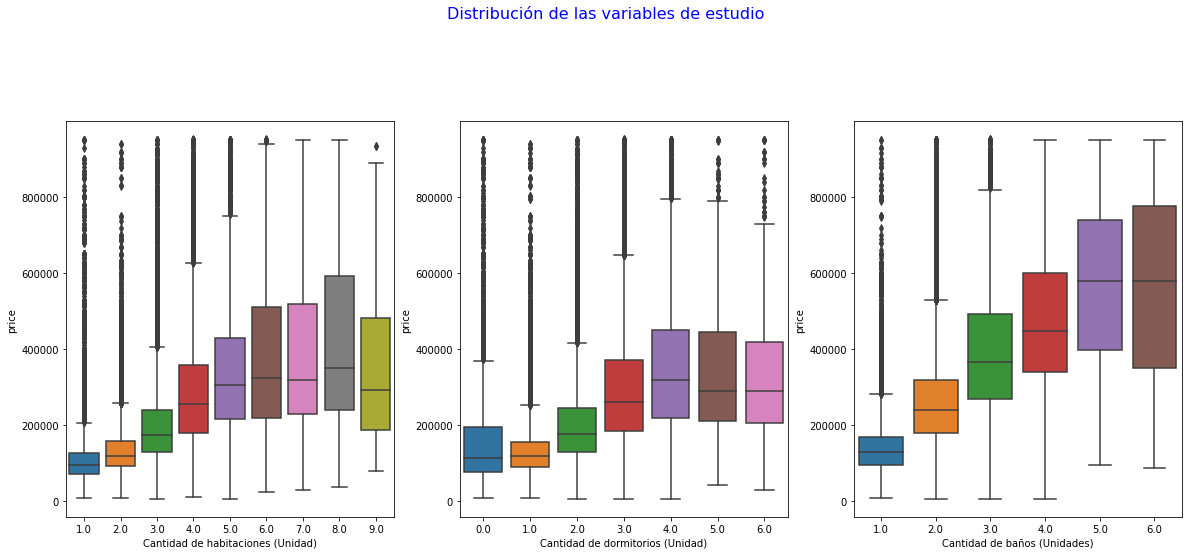

In [8]:
# Distribución y relación de a pares de rooms, bedrooms, bathrooms, surface_total, surface_covered, price
plt.figure(figsize = (20,16))
plt.suptitle('Distribución de las variables de estudio', fontsize=16, color='blue')

vars_to_plot = ['rooms','bedrooms','bathrooms']#,'surface_total','surface_covered','price']
vars_label = ['Cantidad de habitaciones (Unidad)','Cantidad de dormitorios (Unidad)','Cantidad de baños (Unidades)','Superficie Total (m2)','Superficie cubierta (m2)','Precio (USD)']

for i, var in enumerate(vars_to_plot):
  plt.subplot(2,3,i +1)
  sns.boxplot(x = var, y='price', data = df_filtrado_deciles)
  plt.xlabel(vars_label[i])

Text(0.5, 1.0, 'Distribución del precio')

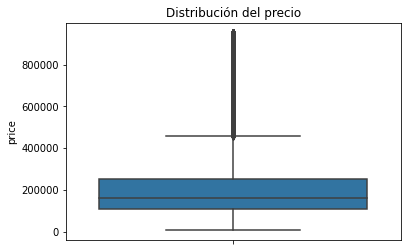

In [9]:
sns.boxplot(data=df_filtrado_deciles, y="price")
plt.title("Distribución del precio")

Como observo una gran dispersión de los datos vamos a analizar con intervalos intercuartilicos

In [ ]:
print(color.END + color.BOLD + color.UNDERLINE +'\nCantidad de nulos por columnas\n\n'+ color.END + color.DARKCYAN, df_filtrado_deciles.isnull (). sum (), sep="")
print(color.RED + '\nValores faltantes:',round(100*df_filtrado_deciles.isnull().sum().sum()/df_filtrado_deciles.shape[0],2),'%')


Cantidad de nulos por columnas

start_date             0
end_date               0
created_on             0
lat                 9083
lon                 9117
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5261
surface_total      19596
surface_covered    20248
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

Valores faltantes: 46.77 %


**Observemos que susede con los rangos intercuartilicos**

In [10]:
Q25 = df.quantile(0.25)
Q75 = df.quantile(0.75)
IQR = Q75 - Q25

df_filtrado_cuartil = df[~((df < (Q25 - 1.5 * IQR)) |(df > (Q75 + 1.5 * IQR))).any(axis=1)]

In [11]:
df_filtrado_cuartil.shape
print(color.DARKCYAN +'Tamaño del dataframe',df_filtrado_cuartil.shape[0],'registros y ',df_filtrado_cuartil.shape[1],'columnas')


Tamaño del dataframe 99557 registros y  19 columnas


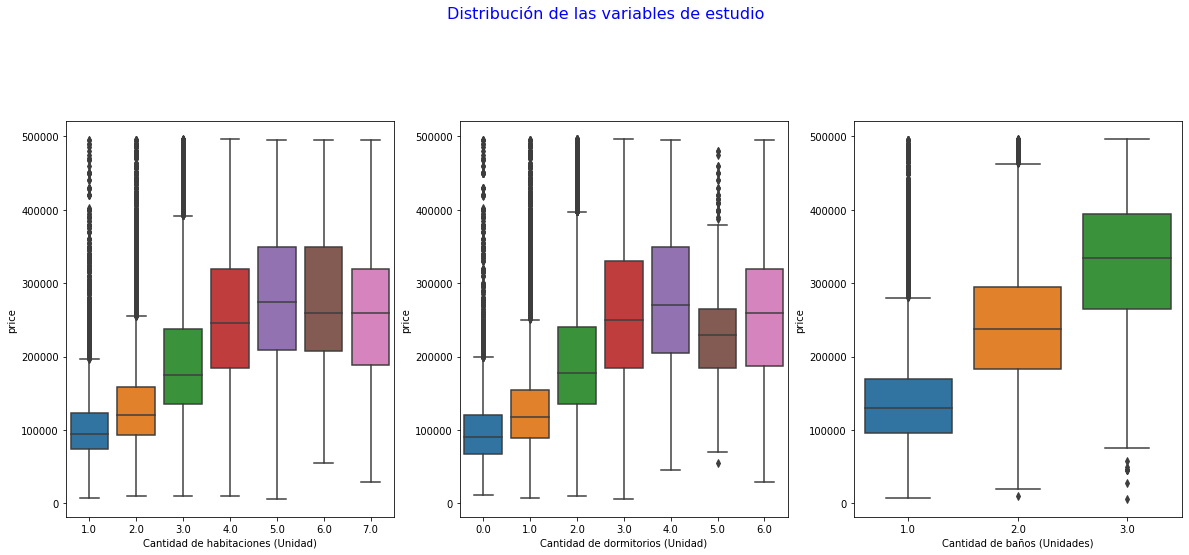

In [12]:
# Distribución y relación de a pares de rooms, bedrooms, bathrooms, surface_total, surface_covered, price
plt.figure(figsize = (20,16))
plt.suptitle('Distribución de las variables de estudio', fontsize=16, color='blue')

vars_to_plot = ['rooms','bedrooms','bathrooms']#,'surface_total','surface_covered','price']
vars_label = ['Cantidad de habitaciones (Unidad)','Cantidad de dormitorios (Unidad)','Cantidad de baños (Unidades)','Superficie Total (m2)','Superficie cubierta (m2)','Precio (USD)']

for i, var in enumerate(vars_to_plot):
  plt.subplot(2,3,i +1)
  sns.boxplot(x = var, y='price', data = df_filtrado_cuartil)
  plt.xlabel(vars_label[i])

Text(0.5, 1.0, 'Distribución del precio')

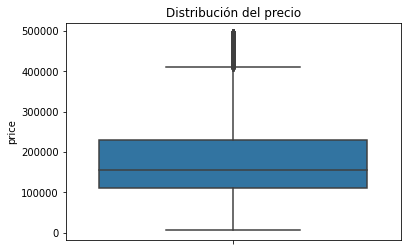

In [13]:
sns.boxplot(data=df_filtrado_cuartil, y="price")
plt.title("Distribución del precio")

Como podemos ver se reduce bastante nuestra muestra de analisis. Luego podremos comprar estos dos set de datos en los diferentes modelos para ver su implicancia

In [ ]:
print(color.END + color.BOLD + color.UNDERLINE +'\nCantidad de nulos por columnas\n\n'+ color.END + color.DARKCYAN, df_filtrado_cuartil.isnull (). sum (), sep="")
print(color.RED + '\nValores faltantes:',round(100*df_filtrado_cuartil.isnull().sum().sum()/df_filtrado_cuartil.shape[0],2),'%')


Cantidad de nulos por columnas

start_date             0
end_date               0
created_on             0
lat                 7793
lon                 7825
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           3374
surface_total      12377
surface_covered    12791
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

Valores faltantes: 44.36 %


Desde el punto de vista de valors faltantes los porcentajes son similares

In [14]:
#hago una copia para manejar nombres mas cortos
df_4=df_filtrado_cuartil.copy()
df_10=df_filtrado_deciles.copy()

In [15]:
cantidad_tipo_propiedad = pd.DataFrame(df_4.groupby(["property_type"], sort = True)["property_type"].count().reset_index(name="Total"))
cantidad_tipo_propiedad.sort_values(by=["Total"], ascending = False, inplace=True, ignore_index=True)
print("---"*30)
print("Cantidad de propiedades en ventas por tipo -> Dataframe rango intercuartilico")
print("---"*30)
cantidad_tipo_propiedad.style.background_gradient(cmap='Blues')

------------------------------------------------------------------------------------------
Cantidad de propiedades en ventas por tipo -> Dataframe rango intercuartilico
------------------------------------------------------------------------------------------


,property_type,Total
0,Departamento,82440
1,PH,11522
2,Casa,4455
3,Oficina,536
4,Lote,193
5,Cochera,149
6,Local comercial,103
7,Otro,94
8,Depósito,64
9,Casa de campo,1


In [16]:
cantidad_tipo_propiedad = pd.DataFrame(df_10.groupby(["property_type"], sort = True)["property_type"].count().reset_index(name="Total"))
cantidad_tipo_propiedad.sort_values(by=["Total"], ascending = False, inplace=True, ignore_index=True)
print("---"*30)
print("Cantidad de propiedades en ventas por tipo -> Dataframe rango deciles")
print("---"*30)
cantidad_tipo_propiedad.style.background_gradient(cmap='Blues')
cantidad_tipo_propiedad.style.background_gradient(cmap='Blues')

------------------------------------------------------------------------------------------
Cantidad de propiedades en ventas por tipo -> Dataframe rango deciles
------------------------------------------------------------------------------------------


,property_type,Total
0,Departamento,102471
1,Casa,16667
2,PH,13667
3,Lote,890
4,Oficina,634
5,Local comercial,289
6,Cochera,257
7,Otro,205
8,Depósito,190
9,Casa de campo,80


Podemos ver que con el rango intercuartilico nos reduce mucho la cantidad de muestras para Casa de campo, Depósitos, Otros y locales comerciales

**Distribución geografica de las propiedades en ventas**

In [ ]:
#Latitud: -34.603739044208844, Longitud-58.38156926871103
px.set_mapbox_access_token("pk.eyJ1IjoicmZwZXR0ZW5vbiIsImEiOiJja29oNjFpaWwwbDA5Mm5uc3Bnazl2MWczIn0.P1UYgB9Y4lfIvQKI8UgSRA")
fig = px.scatter_mapbox(df_4, lat="lat", lon="lon", color="l2",hover_name="property_type", size="price", hover_data=["price", "l3"],
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10, height=1000, center={"lat":-34.603739044208844, "lon":-58.38156926871103}, mapbox_style="open-street-map")
fig.update_layout(title="Distribución de propiedades por Zona", )
print("---"*30)
print("Cantidad de propiedades en ventas por tipo -> Dataframe rango intercuartilico")
print("---"*30)


------------------------------------------------------------------------------------------
Cantidad de propiedades en ventas por tipo -> Dataframe rango intercuartilico
------------------------------------------------------------------------------------------


In [ ]:
fig.show()

Output hidden; open in https://colab.research.google.com to view.

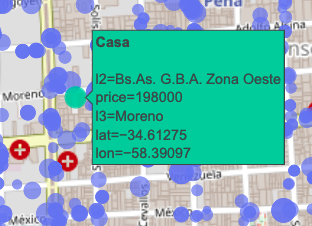

Podemos constatar que las propiedades estan georreferenciadas en su correspondinete zona, si bien existen algunas propiedades que no pero son excepciones como se observa en la imagen de arriba

In [ ]:
px.set_mapbox_access_token("pk.eyJ1IjoicmZwZXR0ZW5vbiIsImEiOiJja29oNjFpaWwwbDA5Mm5uc3Bnazl2MWczIn0.P1UYgB9Y4lfIvQKI8UgSRA")
fig = px.scatter_mapbox(df_10, lat="lat", lon="lon", color="l2",hover_name="property_type", size="price", hover_data=["price", "l3"],
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10, height=1000, center={"lat":-34.60652, "lon":-58.43557}, mapbox_style="open-street-map")
fig.update_layout(title="Distribución de propiedades por Barrio", )
print("---"*30)
print("Cantidad de propiedades en ventas por tipo -> Dataframe rango deciles")
print("---"*30)


------------------------------------------------------------------------------------------
Cantidad de propiedades en ventas por tipo -> Dataframe rango deciles
------------------------------------------------------------------------------------------


In [ ]:
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Debemos recordar que tenemos valores faltantes en Lat y Lon, más adelante se verán estos casos

### **Selección de datos**

Selecciono las variables para el modelo

In [17]:
df_4=df_4[["lat", "lon", "l2", "l3","rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered","price","property_type"]]
df_10=df_10[["lat", "lon", "l2", "l3","rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered","price","property_type"]]

In [ ]:
df_4.head(2)

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH


In [18]:
df_10.head(2)

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH


### **Limpieza de datos**

* Tratamiento de ausentes ( Si hay que imputar o eliminar) Regla del pulgar (ojo solo para referencia) Si su variable tiene más del 20% de datos ausentes, esa variable es candidata a remover. Sin embargo, si se cuenta con el recurso (conocimiento de negocio o al menos el experto) para poder imputar los datos pues se exploran alternativas de imputación
* Tratamiento de atípicos: Regla del pulgar (Ojo úsese bajo precaucion) Si hay muchos atípicos, puede ser una oportunidad para nuevos proyecto de minería. Nuevos segmentos de clientes?


####Verificación de superficies 

In [19]:
# Verificación de instancias que tienen superficie cubierta mayor a superficie total
mascara_superficie=df_4.surface_total<df_4.surface_covered
df_4[mascara_superficie]
df_error_superfice=df_4[mascara_superficie]
print('Cantidad de registros con sumperficie total menor a superficie cubierta',df_error_superfice.shape[0])
#print(color.DARKCYAN +'Tamaño del dataframe',df_select.shape)


Cantidad de registros con sumperficie total menor a superficie cubierta 751


In [20]:
#Filtro los registros con superficie total menora a superficie cubierta
df_select_4 =df_4[~mascara_superficie]
print(color.BLUE +'Registros filtrados',df_select_4.shape[0])

Registros filtrados 98806


In [21]:
# Verificación de instancias que tienen superficie cubierta mayor a superficie total
mascara_superficie=df_10.surface_total<df_10.surface_covered
df_10[mascara_superficie]
df_error_superfice=df_10[mascara_superficie]
print('Cantidad de registros con sumperficie total menor a superficie cubierta',df_error_superfice.shape[0])
#print(color.DARKCYAN +'Tamaño del dataframe',df_select.shape)

Cantidad de registros con sumperficie total menor a superficie cubierta 1175


In [22]:
#Filtro los registros con superficie total menora a superficie cubierta
df_select_10 =df_10[~mascara_superficie]
print(color.BLUE +'Registros filtrados',df_select_10.shape[0])

Registros filtrados 134175


####Tratamiento de valores faltantes

#####A. **Elimino valores faltantes**
Para lugo comparar resultodas de modelos con imputación de valores


In [23]:
#A. Elimino valores faltantes
df_sin_null_4 = df_select_4.dropna()
df_sin_null_10 = df_select_10.dropna()

In [24]:
print(color.BLUE +'Registros filtrados',df_sin_null_4.shape[0])
print(color.BLUE +'Registros filtrados',df_sin_null_10.shape[0])

Registros filtrados 78117
Registros filtrados 104331


Al final prodria usar estos datos para comprar resultados

#####B. **Imputación de valores**

Dado la importancia que tiene la superficie cubierta para el modelo propongo:
* 1 - Para el caso donde no tengo ni la superficie total ni la cubirta cubierta eliminar las instancias
* 2 -  Para el caso donde falte la superficie total solamente asigno el valor de la superficie cubierta a la total
* 3 - Para el caso donde falte la superficie cubierta solamente asigno el valor de la superficie total a la cubierta

**Filtrado de instancias que tienen ambas variables faltantes**

In [25]:
print(df_select_4.shape)
print(df_select_10.shape)

(98806, 11)
(134175, 11)


In [26]:
# Filtro instancias con faltantes en ambas variables
df_select_4_=df_select_4[(df_select_4.surface_total.isna()) & (df_select_4.surface_covered.isna())]
df_select_10_=df_select_10[(df_select_10.surface_total.isna()) & (df_select_10.surface_covered.isna())]

In [27]:
# Cantdiad de instancias con faltantes en ambas variables
print("datos en rango intercuaritlico",df_select_4_.shape[0])
print("Datos en rago de deciles",df_select_10_.shape[0])

datos en rango intercuaritlico 12079
Datos en rago de deciles 19112


In [28]:
# Selección de valors faltantes o en superficie total o en faltantes en superficie cubierta
df_select_4_1 = df_select_4[(df_select_4.surface_total.notna()) | (df_select_4.surface_covered.notna())]
df_select_10_1 = df_select_10[(df_select_10.surface_total.notna()) | (df_select_10.surface_covered.notna())]

In [29]:
# Instancias restantes
print("datos en rango intercuaritlico",df_select_4_1.shape[0])
print("Datos en rago de deciles",df_select_10_1.shape[0])

datos en rango intercuaritlico 86727
Datos en rago de deciles 115063


In [30]:
# Asigno valores de superficie cubierta a valores de superficie total faltante y viceversa
df_select_4_1.loc[df_select_4_1['surface_total'].isna(), 'surface_total'] = df_select_4_1.surface_covered
df_select_10_1.loc[df_select_10_1['surface_total'].isna(), 'surface_total'] = df_select_10_1.surface_covered

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
df_select_4_1.loc[df_select_4_1['surface_covered'].isna(), 'surface_covered'] = df_select_4_1.surface_total
df_select_10_1.loc[df_select_10_1['surface_covered'].isna(), 'surface_covered'] = df_select_10_1.surface_total

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
print("Valores faltantes\n","--"*12)
df_select_10_1.isnull().sum()

Valores faltantes
 ------------------------


lat                7790
lon                7790
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          1698
surface_total         0
surface_covered       0
price                 0
property_type         0
dtype: int64

In [33]:
print("Valores faltantes\n","--"*12)
df_select_4_1.isnull().sum()

Valores faltantes
 ------------------------


lat                6634
lon                6634
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          1215
surface_total         0
surface_covered       0
price                 0
property_type         0
dtype: int64

**Inputación de variables faltantes**

In [34]:
#Realizo escalado
scaler = StandardScaler()
df_select_4_1[["lat","lon", "bathrooms"]] = scaler.fit_transform(df_select_4_1[["lat","lon", "bathrooms"]])
df_select_10_1[["lat","lon", "bathrooms"]] = scaler.fit_transform(df_select_10_1[["lat","lon", "bathrooms"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [35]:
df_select_4_1.head(2)


,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,-0.740408,0.685258,Capital Federal,Boedo,2.0,1.0,1.105308,70.0,58.0,159000.0,PH
2,0.205465,0.385757,Capital Federal,Palermo,2.0,1.0,-0.626504,45.0,45.0,125000.0,PH


In [36]:
df_select_10_1.head(2)

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,-0.431408,0.536387,Capital Federal,Boedo,2.0,1.0,0.670058,70.0,58.0,159000.0,PH
2,-0.032477,0.395954,Capital Federal,Palermo,2.0,1.0,-0.681155,45.0,45.0,125000.0,PH


Vamos a imputar los valores faltantes, para esto usaré KNN Imputer, ya que para lat y lon necesito los vecinos más cercanos para que se logren ubicar más o menos en el mismo lugar

In [37]:
%%time
variable_4 = df_select_4_1[["lat","lon","bathrooms"]]
imputer = KNNImputer(n_neighbors=3,
    weights='uniform',
    metric='nan_euclidean')
variable_4 = imputer.fit_transform(variable_4)
df_select_4_1.loc[:, ["lat","lon", "bathrooms"]] = variable_4

CPU times: user 1min 3s, sys: 3.77 s, total: 1min 6s
Wall time: 1min


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
%%time
variable_10 = df_select_10_1[["lat","lon","bathrooms"]]
imputer = KNNImputer(n_neighbors=3,
    weights='uniform',
    metric='nan_euclidean')
variable_10 = imputer.fit_transform(variable_10)
df_select_10_1.loc[:, ["lat","lon", "bathrooms"]] = variable_10

CPU times: user 1min 43s, sys: 3.26 s, total: 1min 46s
Wall time: 1min 37s


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
#Verificamos que no existen más nulos
df_select_4_1.isnull().sum()

lat                0
lon                0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

In [40]:
df_select_10_1.isnull().sum()

lat                0
lon                0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

In [41]:
df_select_4_1.head(1)


,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,-0.740408,0.685258,Capital Federal,Boedo,2.0,1.0,1.105308,70.0,58.0,159000.0,PH


In [42]:
df_select_10_1.head(1)

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,-0.431408,0.536387,Capital Federal,Boedo,2.0,1.0,0.670058,70.0,58.0,159000.0,PH


In [43]:
df_select_4_1[["lat","lon","bathrooms"]] = scaler.inverse_transform(df_select_4_1[["lat","lon","bathrooms"]])
df_select_10_1[["lat","lon","bathrooms"]] = scaler.inverse_transform(df_select_10_1[["lat","lon","bathrooms"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [44]:
#Realizo redondeo para determinar la cantidad de baños
df_select_4_1["bathrooms"]=df_select_4_1["bathrooms"].round()
df_select_10_1["bathrooms"]=df_select_10_1["bathrooms"].round()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
# Verifico datos
print("Cantidad de registros por cantidad de baños\n","--"*30)
df_select_4_1["bathrooms"].value_counts()



Cantidad de registros por cantidad de baños
 ------------------------------------------------------------


1.0    59805
2.0    22479
4.0     4392
3.0       51
Name: bathrooms, dtype: int64

In [46]:
print("Cantidad de registros por cantidad de baños\n","--"*30)
df_select_10_1["bathrooms"].value_counts()

Cantidad de registros por cantidad de baños
 ------------------------------------------------------------


1.0    71118
2.0    32630
3.0     9006
4.0     2017
5.0      254
6.0       38
Name: bathrooms, dtype: int64

In [47]:
df_select_4_1.head(2)

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,-34.647670,-58.395823,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,-34.575385,-58.428590,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH


In [48]:
df_select_10_1.head(2)

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH


Verifico como quedaron los datos georeferenciados luego de la imputación para no encontrarnos con demasiados datos en otras zonas

In [ ]:
#Latitud: -34.603739044208844, Longitud-58.38156926871103
px.set_mapbox_access_token("pk.eyJ1IjoicmZwZXR0ZW5vbiIsImEiOiJja29oNjFpaWwwbDA5Mm5uc3Bnazl2MWczIn0.P1UYgB9Y4lfIvQKI8UgSRA")
fig = px.scatter_mapbox(df_select_4_1, lat="lat", lon="lon", color="l2",hover_name="property_type", size="price", hover_data=["price", "l3"],
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10, height=1000, center={"lat":-34.603739044208844, "lon":-58.38156926871103}, mapbox_style="open-street-map")
fig.update_layout(title="Distribución de propiedades por Zona", )
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
px.set_mapbox_access_token("pk.eyJ1IjoicmZwZXR0ZW5vbiIsImEiOiJja29oNjFpaWwwbDA5Mm5uc3Bnazl2MWczIn0.P1UYgB9Y4lfIvQKI8UgSRA")
fig = px.scatter_mapbox(df_select_10_1, lat="lat", lon="lon", color="l2",hover_name="property_type", size="price", hover_data=["price", "l3"],
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10, height=1000, center={"lat":-34.603739044208844, "lon":-58.38156926871103}, mapbox_style="open-street-map")
fig.update_layout(title="Distribución de propiedades por Zona", )
fig.show()

Output hidden; open in https://colab.research.google.com to view.

## **Construcción de datos**

##**Integración de datos**

NO se integran más datos

## **Formateo de los datos**


* Encoding 
* Escalado de datos


In [49]:
data=df_select_4_1.copy()

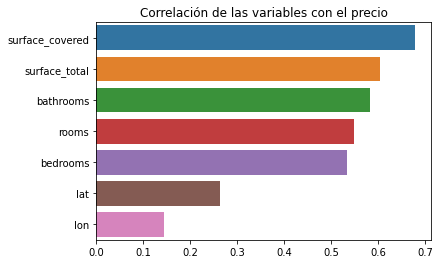

In [50]:
#Correlación antes de label encoding

correlations =data.corr().abs()['price'].sort_values(ascending=False)[1:]
ax = sns.barplot(x=correlations.values,y=correlations.index).set_title('Correlación de las variables con el precio')

**Label Encoding**

Usaré los atributos Rooms, Bathrooms y Bedrooms. Luego realizo correlación para verificar posteriormente 

In [51]:
#Importo librería
from sklearn.preprocessing import LabelEncoder
# creo una instancia de labelencoder
labelencoder = LabelEncoder()

# Asigno valores numnericos
data['rooms'] = labelencoder.fit_transform(data['rooms'])
data['bedrooms'] = labelencoder.fit_transform(data['bedrooms'])
data['bathrooms'] = labelencoder.fit_transform(data['bathrooms'])

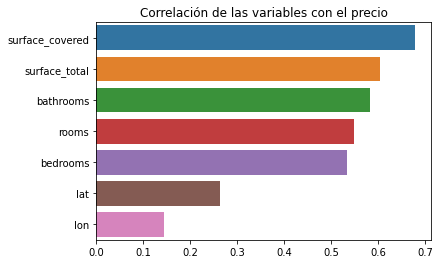

In [52]:
#Correlación luego de labelencoding
correlations =data.corr().abs()['price'].sort_values(ascending=False)[1:]
ax = sns.barplot(x=correlations.values,y=correlations.index).set_title('Correlación de las variables con el precio')

**One - Hot Encoding**

Para One - Hot Encoding usaré los atributos l2, l3 y property-type

In [53]:
data = pd.get_dummies(data, columns=['l2','l3','property_type'])

data

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,l2_Bs.As. G.B.A. Zona Norte,l2_Bs.As. G.B.A. Zona Oeste,l2_Bs.As. G.B.A. Zona Sur,l2_Capital Federal,l3_Abasto,l3_Agronomía,l3_Almagro,l3_Almirante Brown,l3_Avellaneda,l3_Balvanera,l3_Barracas,l3_Barrio Norte,l3_Belgrano,l3_Berazategui,l3_Boca,l3_Boedo,l3_Caballito,l3_Catalinas,l3_Centro / Microcentro,l3_Chacarita,l3_Coghlan,l3_Colegiales,l3_Congreso,l3_Constitución,l3_Escobar,l3_Esteban Echeverría,l3_Ezeiza,l3_Florencio Varela,l3_Flores,l3_Floresta,l3_General Rodríguez,l3_General San Martín,...,l3_Puerto Madero,l3_Quilmes,l3_Recoleta,l3_Retiro,l3_Saavedra,l3_San Cristobal,l3_San Fernando,l3_San Isidro,l3_San Miguel,l3_San Nicolás,l3_San Telmo,l3_San Vicente,l3_Tigre,l3_Tres de Febrero,l3_Tribunales,l3_Velez Sarsfield,l3_Versalles,l3_Vicente López,l3_Villa Crespo,l3_Villa Devoto,l3_Villa General Mitre,l3_Villa Lugano,l3_Villa Luro,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque,property_type_Casa,property_type_Cochera,property_type_Departamento,property_type_Depósito,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro,property_type_PH
1,-34.647670,-58.395823,1,1,1,70.0,58.0,159000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-34.575385,-58.428590,1,1,0,45.0,45.0,125000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-34.546281,-58.448381,1,1,0,85.0,50.0,295000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,-34.575883,-58.457946,1,1,0,56.0,56.0,150000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,-34.592976,-58.440506,1,1,0,70.0,70.0,159500.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146601,-34.826049,-58.131259,2,2,1,107.0,88.0,340000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
146602,-34.823288,-58.131213,2,2,1,107.0,88.0,320000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
146652,-34.548496,-58.669257,1,1,0,38.0,38.0,70000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
146653,-34.623467,-58.674878,1,1,0,45.0,45.0,110000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


**Escalado de datos**

Uso el MinMaxScaler el cual hace un escaado entre 0 y 1. Posteriormente realizaré PCA para disminuir las dimenciones

In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[["lat", "lon", "rooms",	"bedrooms",	"bathrooms",	"surface_total",	"surface_covered"]] = scaler.fit_transform(data[["lat","lon","rooms",	"bedrooms",	"bathrooms",	"surface_total",	"surface_covered"]])
data

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,l2_Bs.As. G.B.A. Zona Norte,l2_Bs.As. G.B.A. Zona Oeste,l2_Bs.As. G.B.A. Zona Sur,l2_Capital Federal,l3_Abasto,l3_Agronomía,l3_Almagro,l3_Almirante Brown,l3_Avellaneda,l3_Balvanera,l3_Barracas,l3_Barrio Norte,l3_Belgrano,l3_Berazategui,l3_Boca,l3_Boedo,l3_Caballito,l3_Catalinas,l3_Centro / Microcentro,l3_Chacarita,l3_Coghlan,l3_Colegiales,l3_Congreso,l3_Constitución,l3_Escobar,l3_Esteban Echeverría,l3_Ezeiza,l3_Florencio Varela,l3_Flores,l3_Floresta,l3_General Rodríguez,l3_General San Martín,...,l3_Puerto Madero,l3_Quilmes,l3_Recoleta,l3_Retiro,l3_Saavedra,l3_San Cristobal,l3_San Fernando,l3_San Isidro,l3_San Miguel,l3_San Nicolás,l3_San Telmo,l3_San Vicente,l3_Tigre,l3_Tres de Febrero,l3_Tribunales,l3_Velez Sarsfield,l3_Versalles,l3_Vicente López,l3_Villa Crespo,l3_Villa Devoto,l3_Villa General Mitre,l3_Villa Lugano,l3_Villa Luro,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque,property_type_Casa,property_type_Cochera,property_type_Departamento,property_type_Depósito,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro,property_type_PH
1,0.392165,0.624100,0.166667,0.166667,0.333333,0.254613,0.210332,159000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.535847,0.583542,0.166667,0.166667,0.000000,0.162362,0.162362,125000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.593697,0.559044,0.166667,0.166667,0.000000,0.309963,0.180812,295000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0.534857,0.547205,0.166667,0.166667,0.000000,0.202952,0.202952,150000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0.500881,0.568792,0.166667,0.166667,0.000000,0.254613,0.254613,159500.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146601,0.037597,0.951576,0.333333,0.333333,0.333333,0.391144,0.321033,340000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
146602,0.043084,0.951633,0.333333,0.333333,0.333333,0.391144,0.321033,320000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
146652,0.589296,0.285646,0.166667,0.166667,0.000000,0.136531,0.136531,70000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
146653,0.440274,0.278688,0.166667,0.166667,0.000000,0.162362,0.162362,110000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


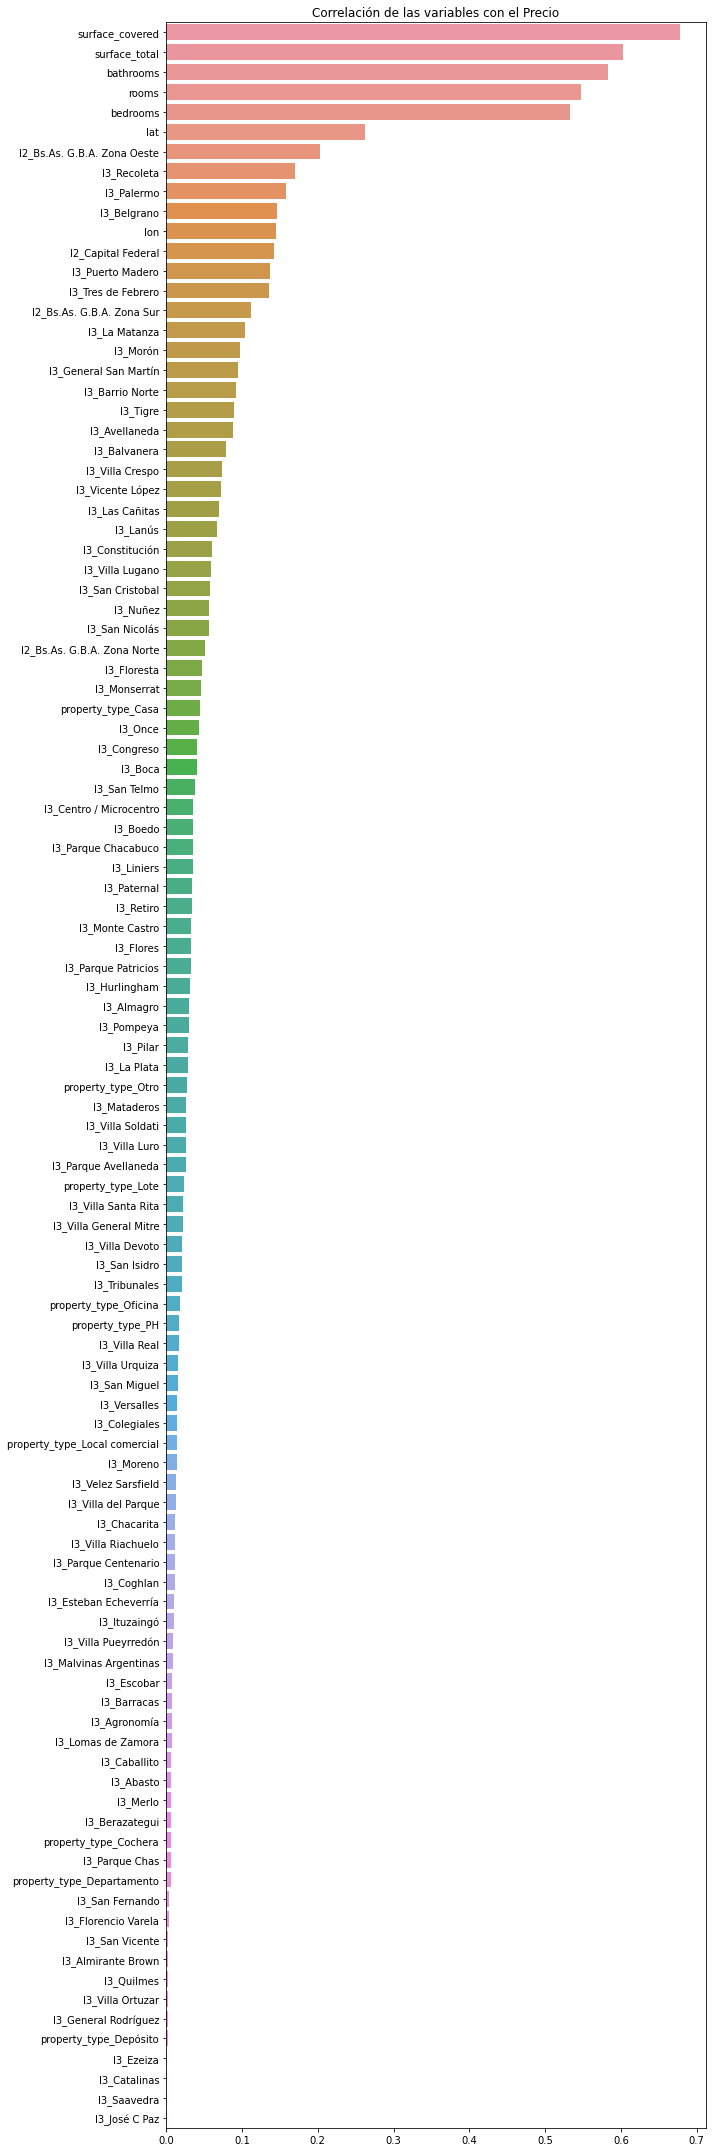

In [55]:
plt.figure(figsize = (10,30))
correlations =data.corr().abs()['price'].sort_values(ascending=False)[1:]
ax = sns.barplot(x=correlations.values,y=correlations.index).set_title('Correlación de las variables con el Precio')
plt.tight_layout()

**División de atributos (X) y target (y)**


In [56]:
X = data.drop(['price'], axis=1)
y = data.price

print(X.shape)
print(y.shape)


(86727, 106)
(86727,)


Dado que se generaron 106 variables voy a reducir la dimencionalidad con técnicas de PCA

**PCA**

El análisis de componentes principales (Principal Component Analysis PCA) es un método de reducción de dimensionalidad que permite simplificar la complejidad de espacios con múltiples dimensiones a la vez que conserva su información

In [57]:
from sklearn.decomposition import PCA

In [58]:
%%time

# Instancio PCA
pca = PCA(0.9)
X_pca = pca.fit_transform(X)

CPU times: user 2.69 s, sys: 147 ms, total: 2.84 s
Wall time: 1.56 s


In [59]:
X_pca.shape

(86727, 37)

De 106 atributos pasamos a tener 37

# **4- Modelado** 

### Seleccionar la técnica de modelado

* Arbol de desición

#### Partición de datos - Entrenamiento y pruebas

In [60]:
# Estas particiones son para la comparación de los resultados obtenidos en el proyecto 1. Adicionalmente, la segunda partición nos servirá para entrenar los diferentes modelos avanzados
from sklearn.model_selection import train_test_split
#X_train_proyecto1, X_test_proyecto1, y_train_proyecto1, y_test_proyecto1 = train_test_split(X_proyecto1, y_proyecto1, test_size=0.20, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

#### Decision Tree -  (sin GridSearch)

In [61]:
#Importamos la librería de árboles
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [62]:
# Instancio el modelo
arbol = DecisionTreeRegressor()

In [63]:
# Entreno el modelo
arbol.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [64]:
# Realizo las predicciones
y_train_pred=arbol.predict(X_train)
y_test_pred=arbol.predict(X_test)

In [65]:
# Evaluo el error cuadrático medio RMSE
rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(color.BOLD + color.DARKCYAN + color.UNDERLINE +'Modelo Benchmarck Arbol de decisión\n' + color.END)
print(color.BOLD + color.DARKCYAN + f'Raiz del Error cuadrático Medio en Train:{rmse_train} con un r2 de: {round(r2_train,4)}' )
print(color.BOLD + color.DARKCYAN + f'Raiz del Error cuadrático Medio en Test:{rmse_test}con un r2 de: {round(r2_test,4)}')

Modelo Benchmarck Arbol de decisión

Raiz del Error cuadrático Medio en Train:6025.675447702991 con un r2 de: 0.9958
Raiz del Error cuadrático Medio en Test:39902.86832038792con un r2 de: 0.817


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



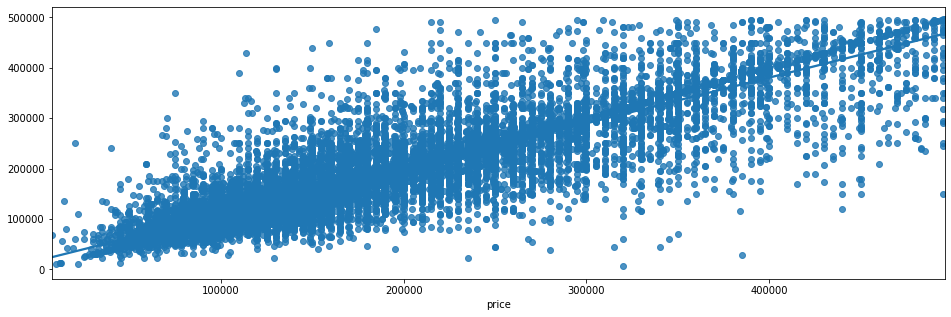

In [ ]:
# Precio vs precio predicho
plt.figure(figsize=(16,5))
sns.regplot(y_test,y_test_pred)
plt.show()

La gran diferencia entre train y test hace presuponer que tenemos overfitting

**Parte B. Modelos Avanzados¶**

Para esta parte B, los modelos avanzados serán:


* Random Forest Regressor
* XGBoost
* SVM



**Random Forest**

Usaré el mismo depth que usé en el proyecto 1 para Árboles de decisión

In [ ]:
from sklearn.ensemble import RandomForestRegressor

randF = RandomForestRegressor(max_depth=10, random_state=30)
randF.fit(X_train, y_train)

y_train_pred = randF.predict(X_train)
y_test_pred = randF.predict(X_test)

In [ ]:
# Evaluo el error cuadrático medio RMSE
rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(color.BOLD + color.DARKCYAN + color.UNDERLINE +'Modelo Random Forest\n' + color.END)
print(color.BOLD + color.DARKCYAN + f'Raiz del Error cuadrático Medio en Train:{rmse_train} con un r2 de: {round(r2_train,4)}' )
print(color.BOLD + color.DARKCYAN + f'Raiz del Error cuadrático Medio en Test:{rmse_test}con un r2 de: {round(r2_test,4)}')

Modelo Random Forest

Raiz del Error cuadrático Medio en Train:34142.38816019855 con un r2 de: 0.866
Raiz del Error cuadrático Medio en Test:38169.14562521647con un r2 de: 0.8325


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



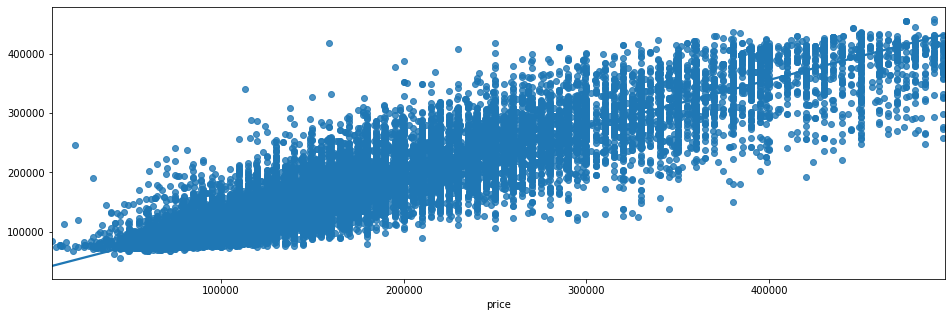

In [ ]:
# Precio vs precio predicho
plt.figure(figsize=(16,5))
sns.regplot(y_test,y_test_pred)
plt.show()

**Cross-val para Random Forest**

In [87]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, cross_validate, StratifiedKFold

In [ ]:
%%time
results = cross_validate(randF, X_train, y_train, cv=5, return_train_score=True, scoring='r2', n_jobs=-1)
print('Mean r2 test: ', np.mean(results['test_score']))

Mean r2 test:  0.8309180176426525
CPU times: user 2.46 s, sys: 497 ms, total: 2.96 s
Wall time: 7min 48s


**Defino parametros para optimización de hiperparámetros de RandomForestRegressor. Para luego utilizar GridSearchCV**

In [ ]:
parameters = {'n_estimators': [100,120],
               'max_depth': [10,14],
               
              }

In [ ]:
randF_optimizado = GridSearchCV(randF, parameters, cv = 5, n_jobs = -1)

randF_optimizado.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=10,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=30,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-

In [ ]:
y_train_pred = randF_optimizado.predict(X_train)
y_test_pred = randF_optimizado.predict(X_test)

In [ ]:
print(,randF_optimizado.best_params_)
print(randF_optimizado.best_estimator_)
print(randF_optimizado.best_score_)

{'max_depth': 14, 'n_estimators': 120}
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=14, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=120, n_jobs=None, oob_score=False,
                      random_state=30, verbose=0, warm_start=False)
0.8697295176163188


In [ ]:
# Evaluo el error cuadrático medio RMSE
rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(color.BOLD + color.DARKCYAN + color.UNDERLINE +'Modelo Random Forest con optimización de parámetros\n' + color.END)
print(color.BOLD + color.DARKCYAN + f'Raiz del Error cuadrático Medio en Train:{rmse_train} con un r2 de: {round(r2_train,4)}' )
print(color.BOLD + color.DARKCYAN + f'Raiz del Error cuadrático Medio en Test:{rmse_test}con un r2 de: {round(r2_test,4)}')

Modelo Random Forest con optimización de parámetros

Raiz del Error cuadrático Medio en Train:22601.88301577547 con un r2 de: 0.9413
Raiz del Error cuadrático Medio en Test:32699.210196630633con un r2 de: 0.8771


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



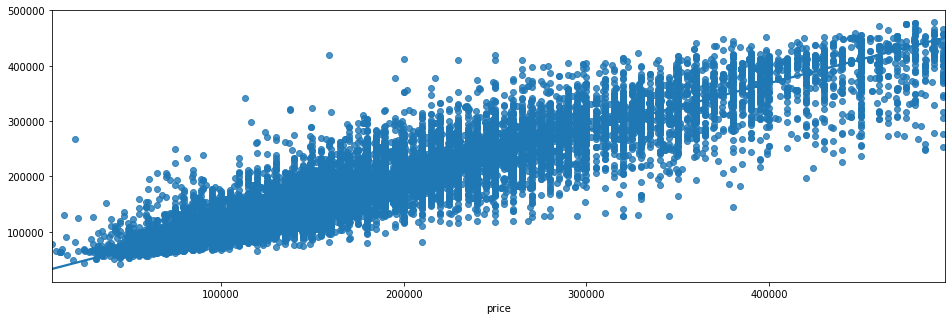

In [ ]:
# Precio vs precio predicho
plt.figure(figsize=(16,5))
sns.regplot(y_test,y_test_pred)
plt.show()

**XGBoost**


---



In [89]:
%%time
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective="reg:linear", max_depth=14, metricrandom_state=30)
xgb_model.fit(X_train, y_train)

y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

[22:39:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 1min 20s, sys: 294 ms, total: 1min 20s
Wall time: 1min 20s


In [90]:
# Evaluo el error cuadrático medio RMSE
rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(color.BOLD + color.DARKCYAN + color.UNDERLINE +'Modelo XGBoost\n' + color.END)
print(color.BOLD + color.DARKCYAN + f'Raiz del Error cuadrático Medio en Train:{rmse_train} con un r2 de: {round(r2_train,4)}' )
print(color.BOLD + color.DARKCYAN + f'Raiz del Error cuadrático Medio en Test:{rmse_test}con un r2 de: {round(r2_test,4)}')

Modelo XGBoost

Raiz del Error cuadrático Medio en Train:11333.982098874107 con un r2 de: 0.9852
Raiz del Error cuadrático Medio en Test:30458.22443951156con un r2 de: 0.8934


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



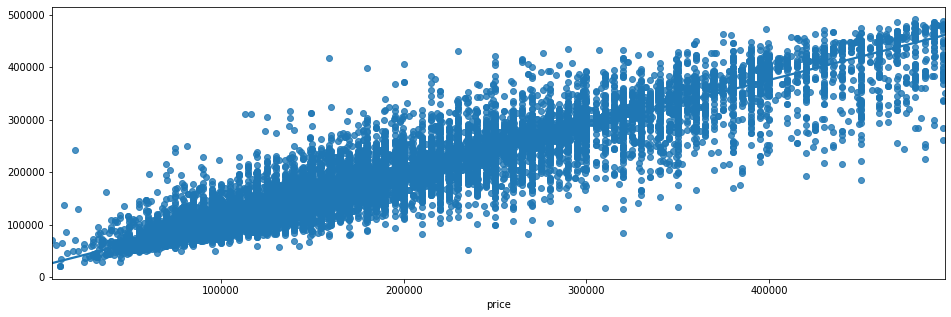

In [91]:
# Precio vs precio predicho
plt.figure(figsize=(16,5))
sns.regplot(y_test,y_test_pred)
plt.show()

**Cross-val para XGBoost**

In [ ]:
%%time
results = cross_validate(xgb_model, X_train, y_train, cv=3, return_train_score=True, scoring='r2',  n_jobs=-1)
print('Mean r2 test: ', np.mean(results['test_score']))

Mean r2 test:  0.8740087904220687
CPU times: user 706 ms, sys: 145 ms, total: 851 ms
Wall time: 2min 15s


**Voy a optimizar los hiperparámetros de XGBRegressor usando GridSearchCV**

In [92]:
parameters = {'objective':['reg:linear'],
              'max_depth':np.arange(1, 20, 1),
              'n_estimators': [80,120]
              }


In [93]:
xgb_optimizado = GridSearchCV(xgb_model, parameters, cv = 5, n_jobs = -1,)

In [94]:
xgb_optimizado.fit(X_train, y_train)

[00:40:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=14,
                                    metricrandom_state=30, min_child_weight=1,
                                    missing=None, n_estimators=100, n_jobs=1,
                                    nthread=None, objective='reg:linear',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 1

In [95]:
y_train_pred = xgb_optimizado.predict(X_train)
y_test_pred = xgb_optimizado.predict(X_test)

In [96]:
# Evaluo el error cuadrático medio RMSE
rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(color.BOLD + color.DARKCYAN + color.UNDERLINE +'Modelo XGBoost con optimización de parámetros\n' + color.END)
print(color.BOLD + color.DARKCYAN + f'Raiz del Error cuadrático Medio en Train:{rmse_train} con un r2 de: {round(r2_train,4)}' )
print(color.BOLD + color.DARKCYAN + f'Raiz del Error cuadrático Medio en Test:{rmse_test}con un r2 de: {round(r2_test,4)}')

Modelo XGBoost con optimización de parámetros

Raiz del Error cuadrático Medio en Train:9602.560443127035 con un r2 de: 0.9894
Raiz del Error cuadrático Medio en Test:30348.823300545337con un r2 de: 0.8941


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



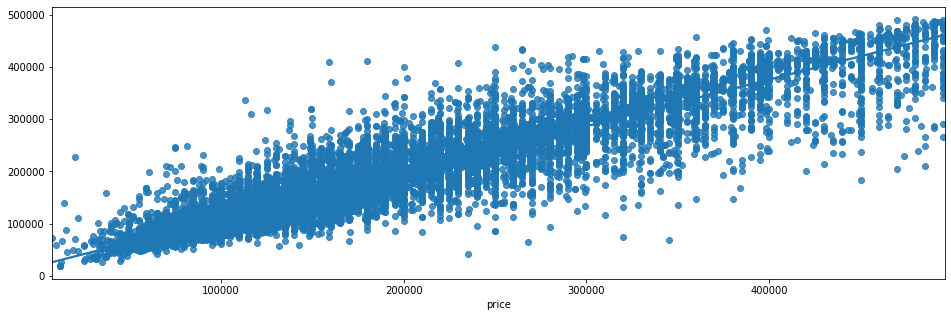

In [97]:
# Precio vs precio predicho
plt.figure(figsize=(16,5))
sns.regplot(y_test,y_test_pred)
plt.show()

In [98]:
#Veo los mejores pararmetros
print(xgb_optimizado.best_params_)
print(xgb_optimizado.best_estimator_)
print(xgb_optimizado.best_score_)

{'max_depth': 15, 'n_estimators': 120, 'objective': 'reg:linear'}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=15, metricrandom_state=30, min_child_weight=1,
             missing=None, n_estimators=120, n_jobs=1, nthread=None,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=None, silent=None, subsample=1,
             verbosity=1)
0.8818639448362753


#### SVM



In [77]:
#Importo librería
from sklearn.svm import SVR

In [78]:
#Inicializo el modelo
svm = SVR()

In [79]:
svm.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [80]:
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

In [81]:
# Evaluo el error cuadrático medio RMSE
rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(color.BOLD + color.DARKCYAN + color.UNDERLINE +'Modelo SVM con optimización de parámetros\n' + color.END)
print(color.BOLD + color.DARKCYAN + f'Raiz del Error cuadrático Medio en Train:{rmse_train} con un r2 de: {round(r2_train,4)}' )
print(color.BOLD + color.DARKCYAN + f'Raiz del Error cuadrático Medio en Test:{rmse_test}con un r2 de: {round(r2_test,4)}')

Modelo SVM con optimización de parámetros

Raiz del Error cuadrático Medio en Train:95231.36016096071 con un r2 de: -0.0423
Raiz del Error cuadrático Medio en Test:95199.56455642989con un r2 de: -0.0418


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



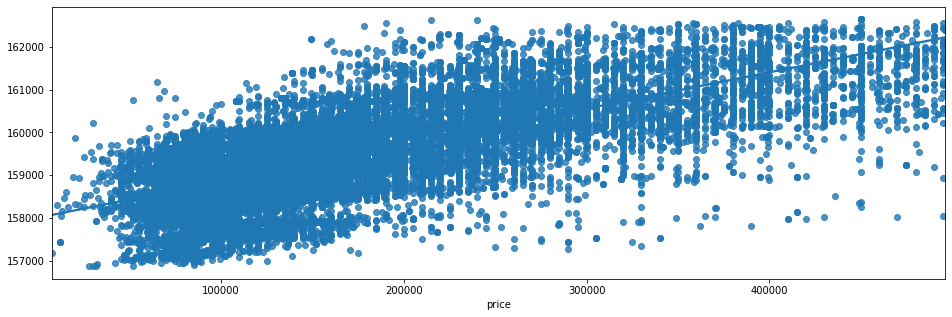

In [82]:
# Precio vs precio predicho
plt.figure(figsize=(16,5))
sns.regplot(y_test,y_test_pred)
plt.show()

### Desafío opcional

Voy a probar metodos de clustering para determinar semejanzas


**Clustering - modelo BIRCH**

Agrupación BIRCH (BIRCH es la abreviatura de Reducción iterativa equilibrada y agrupación mediante
jerarquías) implica la construcción de una estructura de árbol a partir de la cual se extraen los centroides de la agrupación.


In [ ]:
df_select_4_1.head(1)

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,-34.64767,-58.395823,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH


In [66]:
#Selección de datos para armar el cluster
X = df_sin_null_4.drop(['lat','lon','l2', 'l3', 'property_type','price'], axis=1)


In [67]:
X

,rooms,bedrooms,bathrooms,surface_total,surface_covered
1,2.0,1.0,2.0,70.0,58.0
2,2.0,1.0,1.0,45.0,45.0
3,2.0,1.0,1.0,85.0,50.0
5,2.0,1.0,1.0,56.0,56.0
6,2.0,1.0,1.0,70.0,70.0
...,...,...,...,...,...
146601,3.0,2.0,2.0,107.0,88.0
146602,3.0,2.0,2.0,107.0,88.0
146652,2.0,1.0,1.0,38.0,38.0
146653,2.0,1.0,1.0,45.0,45.0


In [76]:
# birch clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from matplotlib import pyplot
# defino modelo
model = Birch(threshold=0.01, n_clusters=5)
# entreno el modelo
model.fit(X)
# asigno cluster a cada muestra
y_ = model.predict(X)
df_sin_null_4['clusters']=y_



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
px.set_mapbox_access_token("pk.eyJ1IjoicmZwZXR0ZW5vbiIsImEiOiJja29oNjFpaWwwbDA5Mm5uc3Bnazl2MWczIn0.P1UYgB9Y4lfIvQKI8UgSRA")
fig = px.scatter_mapbox(df_sin_null_4, lat="lat", lon="lon", color="clusters",hover_name="property_type", size="price", hover_data=["price", "l3","rooms","bedrooms","bathrooms"],
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10, height=1000, center={"lat":-34.603739044208844, "lon":-58.38156926871103}, mapbox_style="open-street-map")
fig.update_layout(title="Distribución de propiedades por cluster generado", )
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [70]:
df_sin_null_4

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,clusters
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,1
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,3
3,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,1
5,-34.593779,-58.441239,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH,3
6,-34.600988,-58.433061,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,PH,1
...,...,...,...,...,...,...,...,...,...,...,...,...
146601,-34.699289,-58.288059,Bs.As. G.B.A. Zona Sur,Quilmes,3.0,2.0,2.0,107.0,88.0,340000.0,Departamento,1
146602,-34.698124,-58.288038,Bs.As. G.B.A. Zona Sur,Quilmes,3.0,2.0,2.0,107.0,88.0,320000.0,Departamento,1
146652,-34.582228,-58.540320,Bs.As. G.B.A. Zona Norte,General San Martín,2.0,1.0,1.0,38.0,38.0,70000.0,Departamento,3
146653,-34.613848,-58.542955,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,2.0,1.0,1.0,45.0,45.0,110000.0,PH,3


In [71]:
df_sin_null_4[df_sin_null_4.clusters==0].describe().style.background_gradient(cmap='Blues')

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,clusters
count,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000
mean,-34.609151,-58.479804,4.277363,3.022388,1.858624,215.743781,140.230514,264384.266998,0.000000
std,0.045812,0.069695,1.081008,0.917770,0.689673,25.799820,39.322423,116539.206172,0.000000
min,-34.707229,-58.648525,1.000000,1.000000,1.000000,167.000000,1.000000,27000.000000,0.000000
25%,-34.638419,-58.527623,4.000000,2.000000,1.000000,195.000000,106.000000,169000.000000,0.000000
50%,-34.611205,-58.477955,4.000000,3.000000,2.000000,211.000000,150.000000,250000.000000,0.000000
75%,-34.582830,-58.427090,5.000000,4.000000,2.000000,235.000000,175.000000,359000.000000,0.000000
max,-34.495084,-58.269716,7.000000,6.000000,3.000000,272.000000,199.000000,496000.000000,0.000000


In [72]:
df_sin_null_4[df_sin_null_4.clusters==1].describe().style.background_gradient(cmap='Blues')

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,clusters
count,28390.000000,28390.000000,28390.000000,28390.000000,28390.000000,28390.000000,28390.000000,28390.000000,28390.000000
mean,-34.598705,-58.442776,3.180838,2.164248,1.472666,81.930468,73.195245,209028.884642,1.000000
std,0.031437,0.046793,0.662273,0.631829,0.569960,14.146557,12.973945,75555.651095,0.000000
min,-34.707241,-58.648034,1.000000,0.000000,1.000000,58.000000,32.000000,10000.000000,1.000000
25%,-34.613540,-58.467484,3.000000,2.000000,1.000000,70.000000,63.000000,158000.000000,1.000000
50%,-34.599660,-58.434961,3.000000,2.000000,1.000000,80.000000,70.000000,199000.000000,1.000000
75%,-34.582470,-58.413575,4.000000,3.000000,2.000000,93.000000,82.000000,250000.000000,1.000000
max,-34.495728,-58.285375,7.000000,6.000000,3.000000,122.000000,106.000000,496000.000000,1.000000


In [73]:
df_sin_null_4[df_sin_null_4.clusters==2].describe().style.background_gradient(cmap='Blues')

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,clusters
count,6731.000000,6731.000000,6731.000000,6731.000000,6731.000000,6731.000000,6731.000000,6731.000000,6731.000000
mean,-34.598517,-58.452413,3.732878,2.636755,1.764522,129.131630,99.757391,264391.900015,2.000000
std,0.035821,0.054827,0.768599,0.702243,0.674715,17.054268,18.134453,98676.767532,0.000000
min,-34.706720,-58.648131,1.000000,1.000000,1.000000,106.000000,36.000000,28000.000000,2.000000
25%,-34.616193,-58.485119,3.000000,2.000000,1.000000,117.000000,90.000000,189000.000000,2.000000
50%,-34.597973,-58.443328,4.000000,3.000000,2.000000,125.000000,104.000000,265000.000000,2.000000
75%,-34.580653,-58.412220,4.000000,3.000000,2.000000,137.000000,112.500000,330000.000000,2.000000
max,-34.495365,-58.282850,7.000000,5.000000,3.000000,186.000000,127.000000,496000.000000,2.000000


In [74]:
df_sin_null_4[df_sin_null_4.clusters==3].describe().style.background_gradient(cmap='Blues')

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,clusters
count,36143.000000,36143.000000,36143.000000,36143.000000,36143.000000,36143.000000,36143.000000,36143.000000,36143.000000
mean,-34.600529,-58.446772,2.005340,1.170130,1.042913,46.369117,41.818222,121246.875578,3.000000
std,0.030170,0.050399,0.611530,0.427231,0.203481,10.737972,8.280033,44363.630181,0.000000
min,-34.707208,-58.646613,1.000000,0.000000,1.000000,10.000000,2.000000,7500.000000,3.000000
25%,-34.615029,-58.471345,2.000000,1.000000,1.000000,39.000000,36.000000,89900.000000,3.000000
50%,-34.600344,-58.440410,2.000000,1.000000,1.000000,46.000000,42.000000,115000.000000,3.000000
75%,-34.584980,-58.414567,2.000000,1.000000,1.000000,54.000000,48.000000,145000.000000,3.000000
max,-34.497606,-58.276828,5.000000,4.000000,3.000000,130.000000,58.000000,460000.000000,3.000000


In [99]:
df_sin_null_4[df_sin_null_4.clusters==4].describe().style.background_gradient(cmap='Blues')

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,clusters
count,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000
mean,-34.601346,-58.445003,4.295429,3.092322,2.104481,156.044359,136.229678,313971.042783,4.000000
std,0.034364,0.054112,0.810738,0.699766,0.686340,18.953061,13.828565,101446.247952,0.000000
min,-34.707266,-58.647417,1.000000,1.000000,1.000000,127.000000,104.000000,53000.000000,4.000000
25%,-34.619557,-58.472218,4.000000,3.000000,2.000000,140.000000,126.000000,249000.000000,4.000000
50%,-34.598941,-58.437675,4.000000,3.000000,2.000000,152.000000,134.000000,320000.000000,4.000000
75%,-34.587614,-58.407354,5.000000,3.000000,3.000000,168.000000,146.000000,392860.000000,4.000000
max,-34.495116,-58.287685,7.000000,6.000000,3.000000,218.000000,172.000000,496000.000000,4.000000


## Coclusión
---

Debajo se muestran los resultados del proyecto 1 para comparar

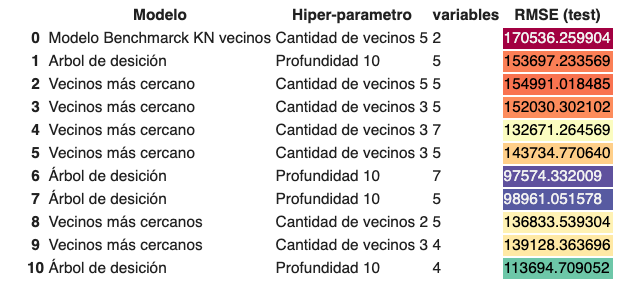

* Como vimos en el Proyecto 1 el mejor modelo fue árbol de decisión, con una profundidad máxima igual a 10, ya sea que utilicemos 5 o 7 variables se obtiene valores similares

* En el Proyecto 2 puedo decir que obtuve mejor resultado con Random Forest con optimización de parámetros, observando mejor balance entre Train y Test
* Con XGBoost observé amplia diferencia entre Train y Test evidenciando overfitting

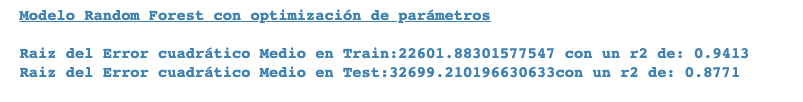

### Determinar los próximos pasos

* Como proximos pasos me gustaría investigar implicancia de las descripciones para  ver si se puede obtener un patron que nos ayude e mejorar el modelo
* Usar la variable Clusters y agregarla al modelo para ver si mejora el resultado